In [1]:
# 1. Seleccionar 2 imagenes
# 2. Agregar ruido de sal y pimienta o alguna otra anomalia
# 3. Selecciona dos tecnicas para eliminar el ruido o la anomalida
# Una con desarrollo propio, la otra con OpenCV
# 4. Realizar pruebas con las 2 tecnicas
# 5. Identifica una medida de desempe;o cuantitativa que permita seleccionar
# la mejor imagen con los mejores parametros (utilizar la img original)
# 6. Comparar y concluir
# !pip install opencv-python
# !pip install matplotlib
# !pip install numpy


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
import time

In [3]:
def imshow(title="Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
# Definiendo nuestras imagenes de prueba
img01 = cv2.imread("gta6.jpg", cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread("jamesweb.jpg", cv2.IMREAD_GRAYSCALE)

In [5]:
# Agregando imagen a ruido

def agregar_ruido_aleatorio(image_ref = None, probabilidad = 0.00):
    
    # Obtener alto y ancho
    h,w = image_ref.shape

    # Crea un arreglo de ceros con el alto y ancho
    img_a_llenar = np.zeros((h,w), np.uint8)
    
    for j in range(h):
        for i in range(w):
            if(random.randint(0,int(100 - (probabilidad * 100))) == 1):
                # Agrega en la posicion del pixel un arreglo aleatorio
                img_a_llenar[j,i] = random.randint(0,255)
            else:
                # Agrega en el pixel el valor de la img original
                img_a_llenar[j,i]=image_ref[j,i]     
                
    # Nueva img02
    imshow("agregar_ruido_aleatorio", img_a_llenar)
    
    return img_a_llenar
    


In [6]:
def agregarRuidoFunClase(image = None, probabilidad = 0.00):
    
    # Crear una matriz
    ruido =  np.zeros_like(image)
    
    # Generar valores de ruido
    cv2.randu(ruido, 0, 255)
    
    # Copia de la imagen como parametro
    img_con_ruido = image.copy()
    
    # Agregando ruido de la imagen
    img_con_ruido[ruido < int(255 * probabilidad / 2)] = 0
    img_con_ruido[ruido > 255 - int(255 * probabilidad / 2)] = 2
    
    # Mostrar resultado
    imshow("IMG RUIDO CON CODIGO DE CLASE", img_con_ruido)
    
    return img_con_ruido
    
    

In [7]:
def agregar_ruido_2(image = None, probabilidad = 0.00):
    
    # Copia de imagen
    img_con_ruido = np.copy(image)
    
    # Generar mascaras con 
    mascara_negra = np.random.rand(*image.shape[:2]) < probabilidad / 2
    img_con_ruido[mascara_negra] = 255
    
    mascara_blanca = np.random.rand(*image.shape[:2]) < probabilidad / 2
    img_con_ruido[mascara_blanca] = 0
    
    return img_con_ruido

    

In [8]:
# blur = cv2.GaussianBlur(img01, (5,5), 0)
# imshow("BLUR", blur)
# DOC https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

In [9]:
## Intentar reducir una imagen
h,w = img01.shape
factor_reduccion = 10

In [10]:
img_to_reduce = np.zeros((int(h/factor_reduccion), int(w/factor_reduccion)), np.uint8)

In [11]:
img_to_reduce.shape
print(f"Total Pixeles: { int(img_to_reduce.shape[0]) * int(img_to_reduce.shape[1])  }")

Total Pixeles: 7326


In [12]:
for j in range(h):
    for i in range(w):
        if((j < int(h/factor_reduccion)) and (i < int(w/factor_reduccion))):
           img_to_reduce[j,i] = img01[j * factor_reduccion, i * factor_reduccion]
        else:
            break
                    
# imshow(f"IMG Reducida: { int(img_to_reduce.shape[0]) * int(img_to_reduce.shape[1])  } pixeles", img_to_reduce) 
# imshow(f"IMG Original: { int(img01.shape[0]) * int(img01.shape[1])  } pixeles", img01) 

In [13]:
## Imagenes con ruido
img1Ruido1 = agregar_ruido_2(img01, 0.10)
img1Ruido2 = agregar_ruido_2(img01, 0.05)

img2Ruido1 = agregar_ruido_2(img02, 0.10)
img2Ruido2 = agregar_ruido_2(img02, 0.05)

In [14]:
# Muestra las imágenes original y procesada
def show_two_images(img1 = None, title1= "", img2 = None, title2 = ""):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    plt.show()
    

def show_three_images(img1=None, title1="", img2=None, title2="", img3=None, title3=""):
    plt.figure(figsize=(15, 5))

    # Imagen 1
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    # Imagen 2
    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')

    # Imagen 3
    plt.subplot(1, 3, 3)
    plt.imshow(img3, cmap='gray')
    plt.title(title3)
    plt.axis('off')

    plt.show()


In [15]:
# Tenica para eliminar ruido manual

In [16]:
# Tecnica OPENCV
#https://www.academia.edu/42756944/M%C3%89TODOS_DE_SUAVIZADO_Y_REDUCCI%C3%93N_DE_RUIDO_EN_IM%C3%81GENES_DIGITALES_EN_PYTHON_CON_opencv_

def eliminar_anomalias_open_cv_medianBlur(img_reference = None):
    
    # Aplicamos el filtro medianBlur()
    sin_ruido = cv2.medianBlur(img_reference, 3)
    return sin_ruido
    
    

In [17]:
def eliminar_anomalias_open_cv(img_reference = None, convolution_method = "2DConvolution" ):
    
    # Documentacion oficial
    # https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
    # https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04
    
    # Registra el tiempo de inicio
    inicio_tiempo = time.time()
    
    # Aplicar el filtro
    sin_ruido = None
    
    if (convolution_method == "2DConvolution"):
        kernelConv = np.ones((5,5), np.float32)/25
        dst = cv2.filter2D(img_reference, -1, kernelConv)
        sin_ruido = dst
    
    if (convolution_method == "blur"):
        blur = cv2.medianBlur(img_reference, 3)
        sin_ruido = blur
            
    # Registra el tiempo de finalización
    fin_tiempo = time.time()

    # Calcula la diferencia
    tiempo_transcurrido = fin_tiempo - inicio_tiempo

    print(f"Tiempo transcurrido: {tiempo_transcurrido} segundos")
    
    # show_two_images(img_reference, "IMG Con Ruido 2", sin_ruido, convolution_method)
    return sin_ruido

In [18]:
eliminar_anomalias_open_cv(img2Ruido1, "blur")

Tiempo transcurrido: 0.0019936561584472656 segundos


array([[40, 40, 39, ...,  5,  5,  5],
       [40, 40, 42, ...,  5,  5,  5],
       [40, 40, 40, ...,  5,  5,  5],
       ...,
       [15, 16, 17, ..., 51, 48, 48],
       [16, 16, 16, ..., 52, 50, 50],
       [16, 16, 16, ..., 52, 52, 50]], dtype=uint8)

In [19]:
def eliminar_anomalias_metodo_propio(img_reference = None):
    
    # Tiempo de inicio
    inicio_tiempo = time.time()

    # Kernel
    arreglo_3x3 = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
    ]
    
    # Obtener el alto y ancho
    h, w = img_reference.shape

    # Crear una imagen para almacenar el resultado
    imagen_resultante = np.zeros((h,w), np.uint8)


    # Aplicar el kernel a la imagen
    for j in range(1, h - 1):
        for i in range(1, w - 1):
            
            # Selecciona una ventana 3x3 alrededor del píxel actual
            arregloVecinos = img_reference[j-1:j+2, i-1:i+2]
            
            #  nuevo_valor = np.sum(ventana)/9
            nuevo_valor = np.median(arregloVecinos)
                
            # Asigna el nuevo valor al píxel correspondiente en la imagen resultante
            imagen_resultante[j, i] = int(np.clip(nuevo_valor, 0, 255))
    
    
    # Tiempo de finalización
    fin_tiempo = time.time()

    # Calcula la diferencia
    tiempo_transcurrido = fin_tiempo - inicio_tiempo

    print(f"Tiempo transcurrido: {tiempo_transcurrido} segundos")
    return imagen_resultante
    

In [20]:
# 
img1ReduccionRuido = eliminar_anomalias_metodo_propio(img1Ruido2)

Tiempo transcurrido: 56.64338707923889 segundos


In [21]:
#
img2ReduccionRuido = eliminar_anomalias_metodo_propio(img2Ruido2)


Tiempo transcurrido: 17.372100353240967 segundos


In [22]:
# Open cv
img1ReduccionRuidoOpenCV = eliminar_anomalias_open_cv(img1Ruido2, "blur")
img2ReduccionRuidoOpenCV = eliminar_anomalias_open_cv(img2Ruido2, "blur")


Tiempo transcurrido: 0.0019960403442382812 segundos
Tiempo transcurrido: 0.0 segundos


# Resultados Open CV

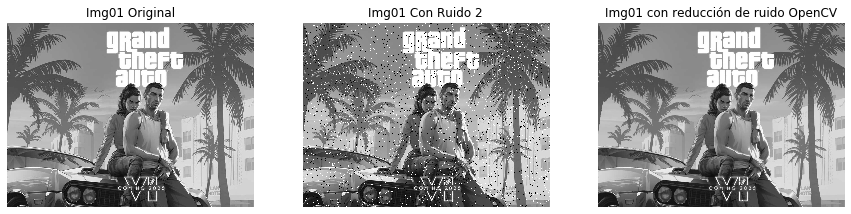

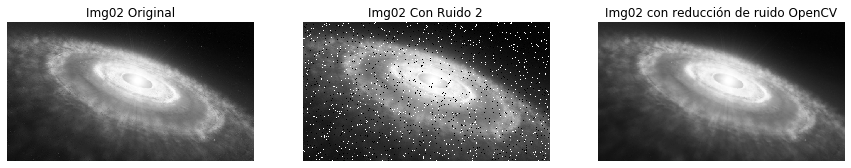

In [23]:
# Resultados OPENCV --------------------
# IMG O1 - Método OpenCV
show_three_images(img01, "Img01 Original", img1Ruido2, "Img01 Con Ruido 2", img1ReduccionRuidoOpenCV, "Img01 con reducción de ruido OpenCV")

# IMG 02 - Método OpenCV
show_three_images(img02, "Img02 Original", img2Ruido2, "Img02 Con Ruido 2", img2ReduccionRuidoOpenCV, "Img02 con reducción de ruido OpenCV")


# Resultados Método Propio

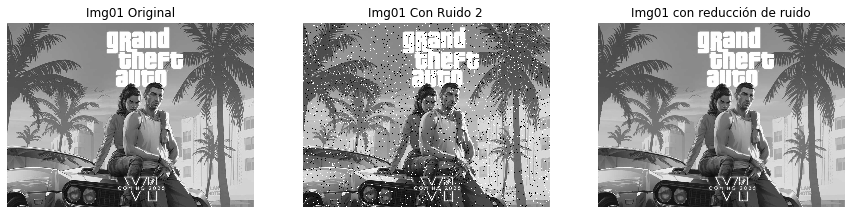

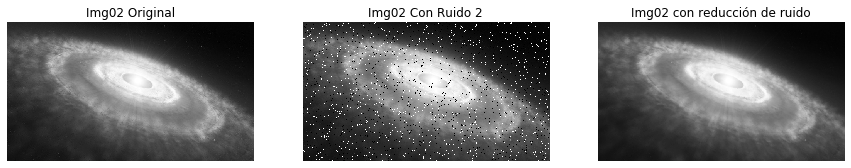

In [24]:
# Resultados Método Propio ------
# IMG 01 - Método Propio
show_three_images(img01, "Img01 Original", img1Ruido2, "Img01 Con Ruido 2", img1ReduccionRuido, "Img01 con reducción de ruido")

# IMG 02 - Método Propio
show_three_images(img02, "Img02 Original", img2Ruido2, "Img02 Con Ruido 2", img2ReduccionRuido, "Img02 con reducción de ruido")